<a href="https://colab.research.google.com/github/Amanda1997-star/AI4CCEE/blob/main/in_class_activity/lecture4/Submissions/Lecture4_Amanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
!pip install Pillow==9.5.0

In [12]:
# Activity #0: Sensor Noise Visualization
df = pd.read_csv('/content/Wavetronix.csv')
print(df.head())

   day                 Time  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
0    1  2022-07-10 00:00:00            NaN            NaN            3.0   
1    1  2022-07-10 00:01:00           10.0           62.0            2.0   
2    1  2022-07-10 00:02:00            5.0           63.6            4.0   
3    1  2022-07-10 00:03:00           11.0           58.2            9.0   
4    1  2022-07-10 00:04:00           19.0           60.2           17.0   

   WAVE-SW-Speed  Month  Year  
0           59.5     10  2021  
1           59.0     10  2021  
2           58.4     10  2021  
3           60.0     10  2021  
4           61.2     10  2021  


In [13]:
print(df.describe())

                 day  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
count  223048.000000  218324.000000  218324.000000  218613.000000   
mean       15.843863      49.757951      61.758002      38.232324   
std         8.788900      34.568520       3.577977      29.641309   
min         1.000000       0.000000       0.000000       0.000000   
25%         8.000000      15.000000      60.800000      10.000000   
50%        16.000000      50.000000      62.400000      35.000000   
75%        23.000000      77.000000      63.600000      59.000000   
max        31.000000     214.000000      90.500000     155.000000   

       WAVE-SW-Speed          Month           Year  
count  218613.000000  223048.000000  223048.000000  
mean       61.066343       6.544506    2021.495570  
std         4.140103       4.568554       0.499981  
min         0.000000       1.000000    2021.000000  
25%        60.200000       2.000000    2021.000000  
50%        61.800000      10.000000    2021.000000  
75%    

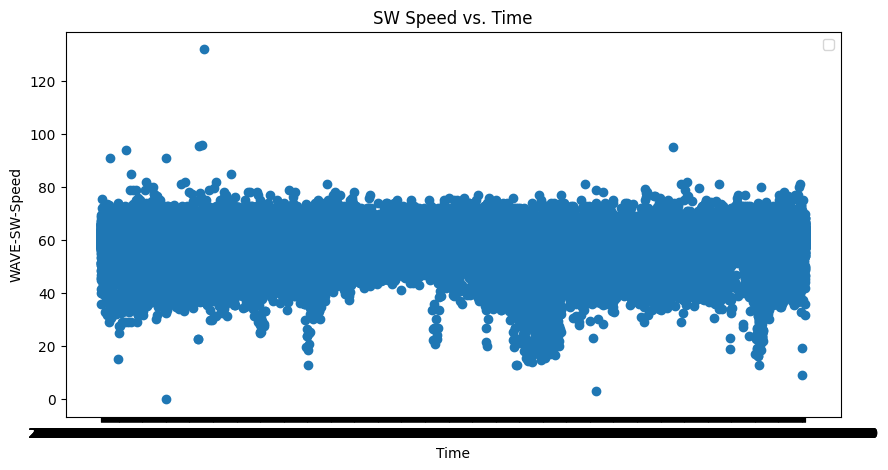

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Time'], df['WAVE-SW-Speed'])
plt.xlabel('Time')
plt.ylabel('WAVE-SW-Speed')
plt.title('SW Speed vs. Time')
plt.legend()
plt.show()

In [16]:
# Day 1
df['Time'] = pd.to_datetime(df['Time'])
df_day1 = df[df['day'] == 1]
print(df_day1.head())

   day                Time  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
0    1 2022-07-10 00:00:00            NaN            NaN            3.0   
1    1 2022-07-10 00:01:00           10.0           62.0            2.0   
2    1 2022-07-10 00:02:00            5.0           63.6            4.0   
3    1 2022-07-10 00:03:00           11.0           58.2            9.0   
4    1 2022-07-10 00:04:00           19.0           60.2           17.0   

   WAVE-SW-Speed  Month  Year  
0           59.5     10  2021  
1           59.0     10  2021  
2           58.4     10  2021  
3           60.0     10  2021  
4           61.2     10  2021  


In [23]:
# Counting the number of minutes where speed is below the threshold
threshold = 50
below_threshold = df_day1[df_day1['WAVE-SW-Speed'] < threshold].shape[0]
print(f'Number of minutes where speed is below {threshold} units: {below_threshold}')

Number of minutes where speed is below 50 units: 555


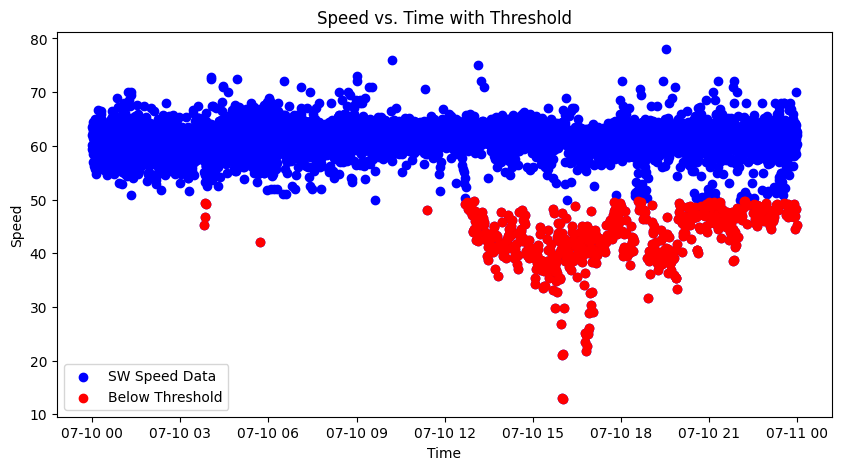

In [24]:
# Highlighting region below threshold
plt.figure(figsize=(10, 5))
plt.scatter(df_day1['Time'], df_day1['WAVE-SW-Speed'], label='SW Speed Data', color='blue')
plt.scatter(df_day1['Time'][df_day1['WAVE-SW-Speed'] < threshold], df_day1['WAVE-SW-Speed'][df_day1['WAVE-SW-Speed'] < threshold], color='red', label='Below Threshold')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed vs. Time with Threshold')
plt.legend()
plt.show()


<ipython-input-28-c58eec8da50b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day1['rolling_avg'] = df_day1['WAVE-SW-Speed'].rolling(window=5).mean()


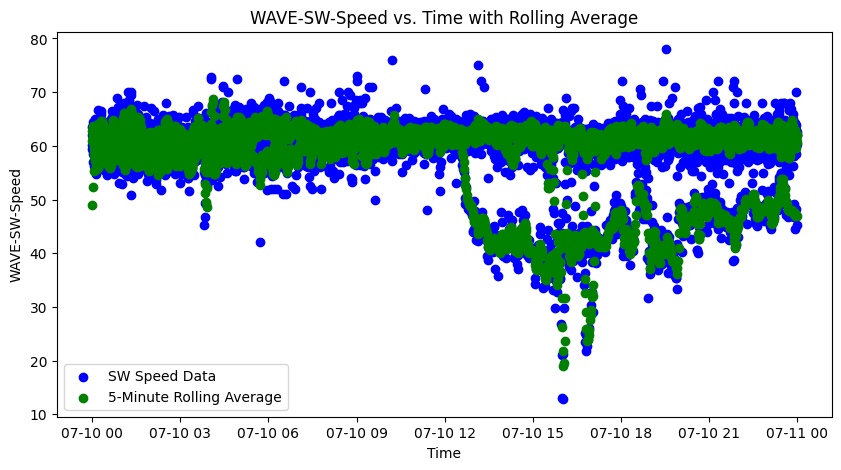

In [28]:
# Activity #1: Smoothing with a Rolling Average
df_day1['rolling_avg'] = df_day1['WAVE-SW-Speed'].rolling(window=5).mean()

plt.figure(figsize=(10, 5))
plt.scatter(df_day1['Time'], df_day1['WAVE-SW-Speed'], label='SW Speed Data', color='blue')
plt.scatter(df_day1['Time'], df_day1['rolling_avg'], label='5-Minute Rolling Average', color='green')
plt.xlabel('Time')
plt.ylabel('WAVE-SW-Speed')
plt.title('WAVE-SW-Speed vs. Time with Rolling Average')
plt.legend()
plt.show()


In [29]:
#Activity #2: Introduction to Fourier Transform
#Checking for missing data
missing_data = df_day1.isnull().sum()
print(missing_data)


day                0
Time               0
WAVE-NE-Count    270
WAVE-NE-Speed    270
WAVE-SW-Count    164
WAVE-SW-Speed    164
Month              0
Year               0
rolling_avg      824
dtype: int64


In [30]:
#Filling missing values using interpolation
df_day1['WAVE-SW-Speed'] = df_day1['WAVE-SW-Speed'].interpolate()


<ipython-input-30-8f04f66e2644>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day1['WAVE-SW-Speed'] = df_day1['WAVE-SW-Speed'].interpolate()


In [31]:
#Check for and remove duplicate rows
df_day1.drop_duplicates(inplace=True)


<ipython-input-31-82d34c4905e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day1.drop_duplicates(inplace=True)


In [39]:
#Remove any speed values that fall outside the speed of 50 to 70
df1 = df_day1[(df_day1['WAVE-SW-Speed'] >= 50) & (df['WAVE-SW-Speed'] <= 70)]


<ipython-input-39-8ce324d59d15>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_day1[(df_day1['WAVE-SW-Speed'] >= 50) & (df['WAVE-SW-Speed'] <= 70)]


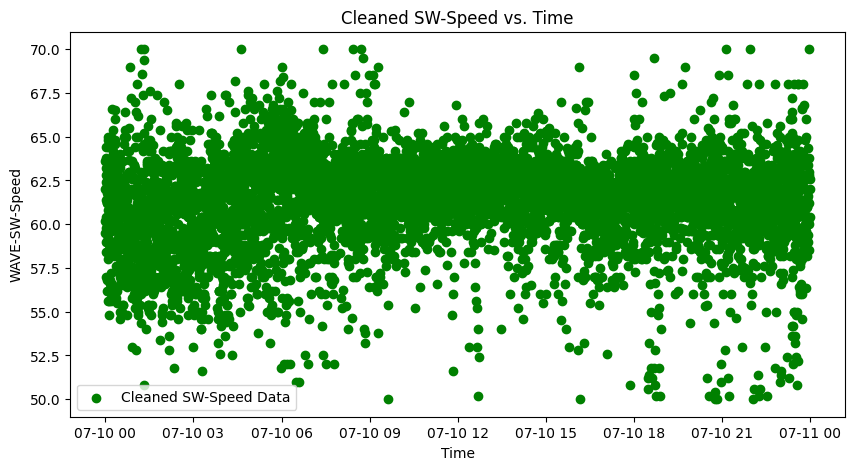

In [40]:
#Plotting clean data
plt.figure(figsize=(10, 5))
plt.scatter(df1['Time'], df1['WAVE-SW-Speed'], label='Cleaned SW-Speed Data', color='green')
plt.xlabel('Time')
plt.ylabel('WAVE-SW-Speed')
plt.title('Cleaned SW-Speed vs. Time')
plt.legend()
plt.show()


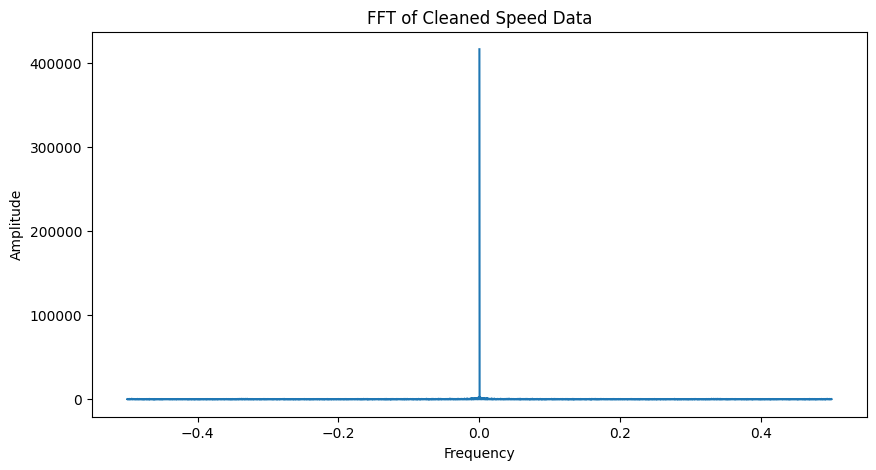

In [41]:
#Applying the FFT to the cleaned data
import numpy as np

# Perform FFT
fft_values = np.fft.fft(df1['WAVE-SW-Speed'])
fft_freq = np.fft.fftfreq(len(fft_values))

plt.figure(figsize=(10, 5))
plt.plot(fft_freq, np.abs(fft_values))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT of Cleaned Speed Data')
plt.show()

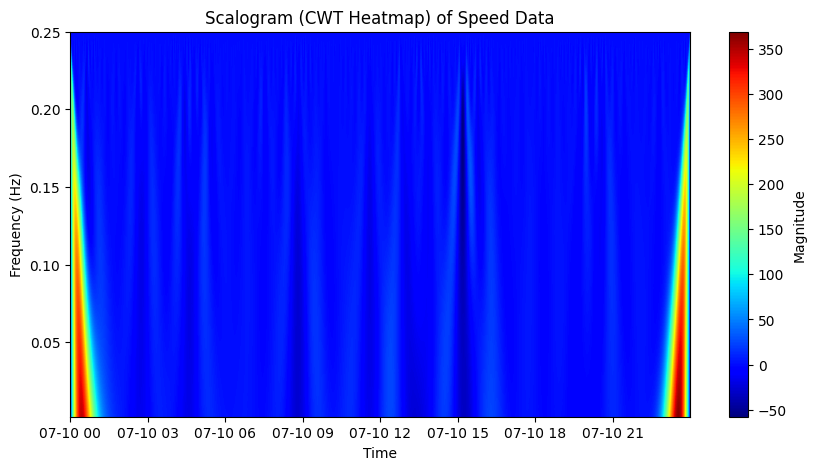

In [46]:
#Plotting a scalogram of wavelet coefficients
plt.figure(figsize=(10, 5))
plt.imshow(coefficients, extent=[df1['Time'].min(), df1['Time'].max(), frequencies.min(), frequencies.max()], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.title('Scalogram (CWT Heatmap) of Speed Data')
plt.show()



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.2 MB/s eta 0:00:00


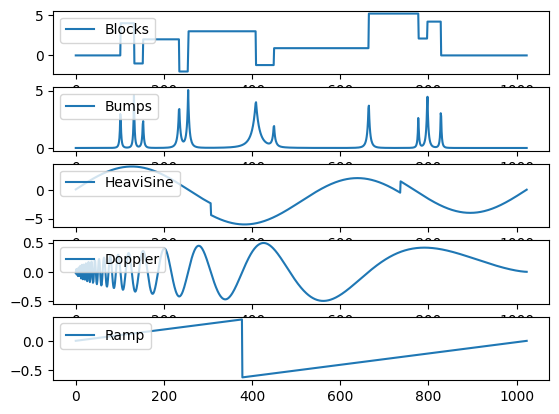

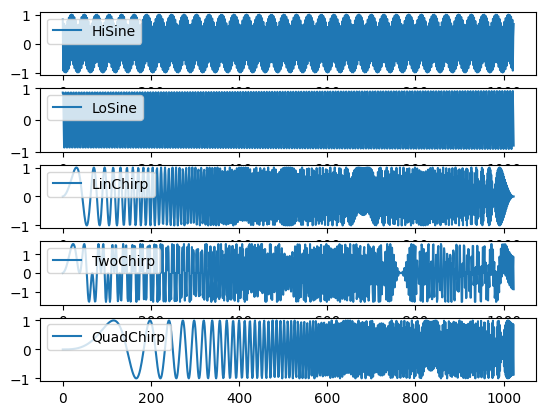

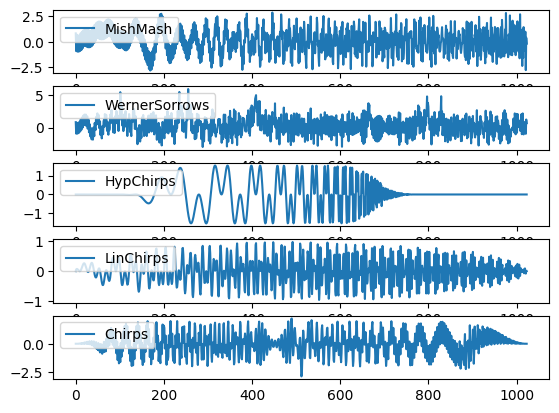

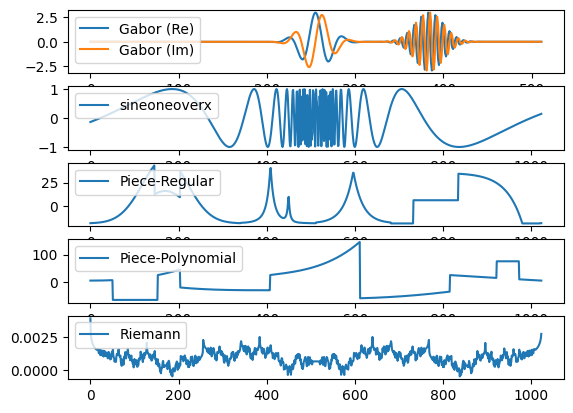

In [42]:
#!/usr/bin/env python

"""Plot the  set of 1D demo signals available in `pywt.data.demo_signal`."""

import matplotlib.pyplot as plt
import numpy as np
!pip install PyWavelets
import pywt

# use 'list' to get a list of all available 1d demo signals
signals = pywt.data.demo_signal('list')

subplots_per_fig = 5
signal_length = 1024
i_fig = 0
n_figures = int(np.ceil(len(signals)/subplots_per_fig))
for i_fig in range(n_figures):
    # Select a subset of functions for the current plot
    func_subset = signals[
        i_fig * subplots_per_fig:(i_fig + 1) * subplots_per_fig]

    # create a figure to hold this subset of the functions
    fig, axes = plt.subplots(subplots_per_fig, 1)
    axes = axes.ravel()
    for n, signal in enumerate(func_subset):
        if signal in ['Gabor', 'sineoneoverx']:
            # user cannot specify a length for these two
            x = pywt.data.demo_signal(signal)
        else:
            x = pywt.data.demo_signal(signal, signal_length)
        ax = axes[n]
        ax.plot(x.real)
        if signal == 'Gabor':
            # The Gabor signal is complex-valued
            ax.plot(x.imag)
            ax.legend(['Gabor (Re)', 'Gabor (Im)'], loc='upper left')
        else:
            ax.legend([signal, ], loc='upper left')
    # omit axes for any unused subplots
    for n in range(n + 1, len(axes)):
        axes[n].set_axis_off()
plt.show()

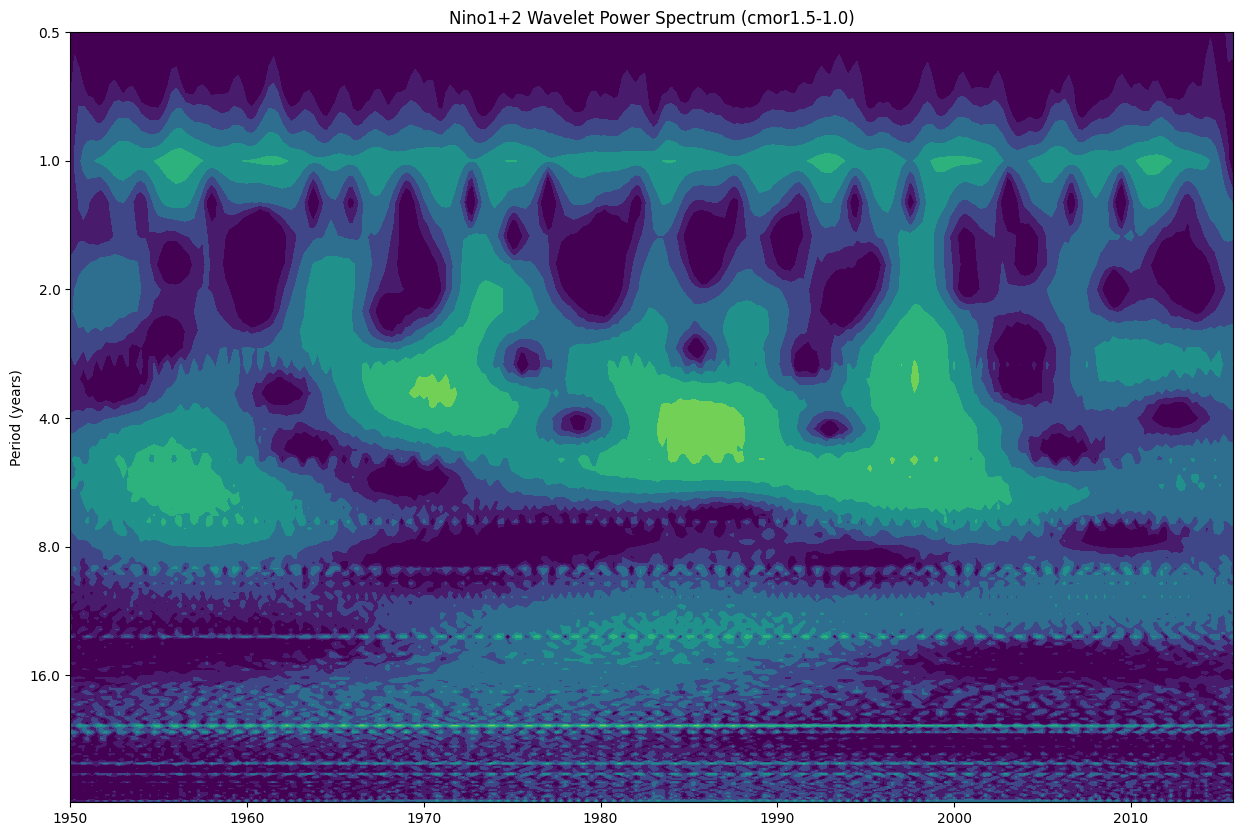

In [43]:
#!/usr/bin/env python

import matplotlib.pyplot as plt
import numpy as np

import pywt

time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title(f'Nino1+2 Wavelet Power Spectrum ({wavelet})')
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()

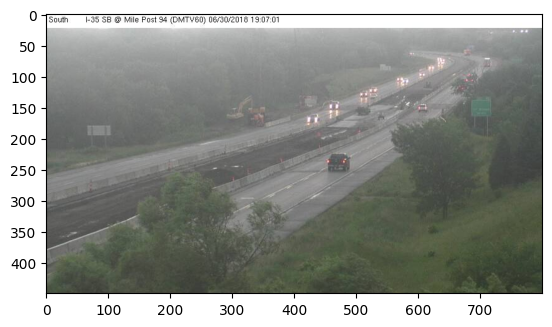

In [6]:
#Activity 4
from PIL import Image
import numpy as np
import pywt
import matplotlib.pyplot as plt
img = Image.open('/content/2018-06-30-19-05.jpg')
plt.imshow(img)
plt.show()

In [7]:
img_array = np.array(img)
coeffs = pywt.dwt2(img_array, 'haar')
LL, (LH, HL, HH) = coeffs

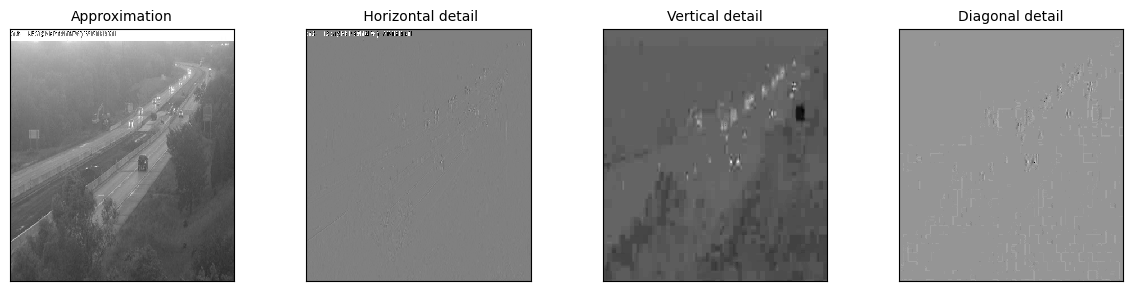

In [9]:
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    # Convert a to grayscale by averaging the channels
    a = np.mean(a, axis=2)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()